## Optimization for Neural Networks(Learning Rates)
This series of notebooks will act as a crash course on Optimization techniques requaired for Machine learning and Neural networks. In this tutorial we are going to see how learning rates inpact the neural network training. I assume you have finished the Multi-layer Neural Network tutorial. 

Let us assume we have a neural network architecture that can solve the problem. Though it has a nice architecture, it is not useful because it has default or random weights. To make it work we need to use a set of weights that work best for our problem. To find which set of weights work for our network, we need the actual solution which we don't know, which brings us to the classic chicken and egg problem. Let us approach this problem from another angle. What is the purpose of this network? It should give an accurate solution for our problem. Let us take a step back and think less greedily. If not an accurate solution, we need an approximate solution for our problem. Though there is only one actual solution, there are many approximate solution and we should find the best among these solutions. One naïve approach for this problem is to try all possible parameters and pick one set of parameters that gives the most accurate solution. Though it looks promising, it is less practical because we must try near infinite number of parameter sets. 

Let us take a step back and rethink the problem again. Imagine all these approximate solutions into a space with peaks and valleys. We want to find the deepest valley in that solution space to have a minimum distance between the actual solution and approximate solution. That difference is called the error. Since our naïve solution did not gave intended results, let us call our friendly neighborhood optimization, an expert in minimizing and maximizing. He suggested us that before taking a step find the direction that descends steeply and take a step in that direction and this technique is called gradient descent. This is an intuitive technique as it helps us to move closer to the destination with every step we take. Let us keep the heuristic aside for some time and talk mathematics behind this technique. We are trying to find the parameters that minimize an error function. We should find the gradient of the error function w.r.t the parameters, which gives the direction of the steepest descent. We use that gradient to update the parameters. 

### Stochastic Gradient descent: 
In a regular gradient descent technique, we do not update the parameters with every gradient calculation. We just cache the gradients until we have gradients for entire training set and use them to perform single update, for this reason it is also called as Full-Batch Gradient Descent. This technique is quite stable because it gives nice picture of the error function. However, this technique has two shortcomings
•	This is resource intensive in huge datasets and it is practically impossible for few datasets.
•	Most of the real-world datasets have redundant examples. 
There is a slight variation of regular Gradient Descent called Stochastic Gradient Descent (SGD). SGD updates the parameters for every gradient calculation. In a dataset with redundant data, SGD will have a faster convergence at the cost of uncertainity. 

### Mini-batch Stochastic Gradient Descent:
Though SGD looks promising, it is not stable and carries a lot of uncertainity on the error function and few records can drastically impact the learning. We can update the paramerts once for a small batch of training examples which acts as a middle ground between Full-Batch Gradient Descent and SGD.  One full run through the entire training set is called an ***epoch***. Size of the mini-batch can be changed based on availability of the resources. It is advised to have a mini-batch small enough to load once in your GPU(If you are training the Neural network with GPU). Mini-batch saved my day when I was training neural networks with a 750 Ti GPU with 2GB VRAM. Mini-Batching is not just dedicated to SGD, you can use it with any optimizer.

### Learning Rate: -
Using Gradient Descent, we follow the direction shown by the gradient. However, the magnitude of the steps are partly in our control. We take some risk and take bigger steps or we can be cautious and take baby steps by scaling the gradients. That scaling factor is called learning rate. 

We built a network for logistic regression in the Quick Start tutorial. In this tutorial we will train a same Logistic Regression architecture with different learning rates and study it's impact on training the network.


In [13]:
import theano
from yann.network import network
from yann.special.datasets import cook_mnist
import matplotlib.pyplot as plt

Let's create a function to read the costs(error) throughout the training. After a model is trained, Yann saves the costs in ***`./resultor/costs.txt`*** file.

The following function returns the costs after reading the file.

In [14]:
def get_cost():
    costs = []
    with open('./resultor/costs.txt') as costf:
        costs = [float(cost.rstrip()) for cost in costf]
    return costs

Similar to the previous tutorials, we will use MNIST dataset for the traning the net. The following block of code imports the MNIST dataset.

In [15]:
data = cook_mnist()
dataset_params  = { "dataset": data.dataset_location(), "n_classes" : 10 }

. Setting up dataset 
.. setting up skdata
... Importing mnist from skdata
.. setting up dataset
.. training data
.. validation data 
.. testing data 
. Dataset 58951 is created.
. Time taken is 0.522842 seconds


The following function returns a Logistic Regression network given dataset.

In [16]:
def get_lr(dataset_params):
    net = network()
    net.add_layer(type = "input", dataset_init_args = dataset_params)
    net.add_layer(type = "classifier" , num_classes = 10)
    net.add_layer(type = "objective")
    net.cook(verbose=0)
    return net

Let's train the network with very high learning rates to very low learning rates and store these results in costs array and plot them. The time_took array stores the time took while training for 40 iterations for each learning rate using the ***`it.default_timer()`*** function. In Yann we can give provide learning rate to the train function and it is a tuple of three values.

<pre> learning_rate  : (annealing_decay_rate, initial_learning_rate, era2_learning_rate, era3_learning_rate, .......eraN_learning_rate ). Default is the tuple (0.1,0.001,0.005) </pre>
These terms will be better explained in the later sections.
YANN takes learning rate as N+1 tuple, where N is the number eras you plan to train. First value is the annealing rate and from two to N+1 values are the learning rates for N eras.

In [17]:
lrates = [100, 10, 1, 0.5, 0.1 ,0.01, 0.001,0.0001, 0.00001]
costs = []
time_took = []
for lrate in lrates:
    lr = get_lr(dataset_params)
    learning_rates = (0, lrate, 0)
    lr.train(verbose=0, epochs = (40),learning_rates = learning_rates, optimizer_type= 'sgd', early_terminate=False)
    costs.append(get_cost())

. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.9927
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.8862
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.1947
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.0061
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.1547
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.5395
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.1907
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.2288
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.1417
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.1925
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 33.062
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.4777
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.1904
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 34.0221
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.5473
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 29.8848
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 32.1449
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 32.0964
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.6695
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.4076
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.8601
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.711
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.3811
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.7789
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.6225
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.6798
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.5961
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.3402
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.969
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 32.0151
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.0084
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.8247
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.9163
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 31.1718
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.2438
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.9573
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 29.895
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.6227
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 30.0695
... Learning Rate       : 100.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 32.6613
... Learning Rate       : 100.0
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.2821
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4428
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.2124
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.3761
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.5881
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.2555
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4493
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4957
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.394
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.1985
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.2707
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4609
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.2801
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.5857
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.3141
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.0116
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 10.8772
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4071
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 10.9797
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.3368
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.255
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4998
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.1806
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4619
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.3119
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.397
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4596
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4291
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.5758
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.2763
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.3569
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.0878
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.0144
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4464
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.192
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.37
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.4833
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.6378
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.5548
... Learning Rate       : 10.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 11.3451
... Learning Rate       : 10.0
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.590407
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.349177
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.32498
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.312293
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.304051
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.298344
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.294266
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.2916
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.289688
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.288434
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.287595
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.286981
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.2865
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.286113
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.285794
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.285527
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.285301
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.285106
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284914
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284816
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284753
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284701
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.28466
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284627
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284599
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284577
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284558
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284543
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.28453
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284519
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.28451
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284502
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284496
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284491
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284486
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284482
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284479
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284476
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284474
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.284472
... Learning Rate       : 1.0
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.58115
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.37758
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.3462
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.329835
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.319258
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.311661
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.305842
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.301186
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.29734
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.294086
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.291312
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.28903
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.28703
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.285256
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.283861
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.282738
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.281786
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.280964
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.280282
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.279744
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.279295
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.278936
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.278625
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.278353
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.278111
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.277896
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.277702
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.277528
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.27737
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.277225
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.277094
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276973
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276861
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276758
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276663
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276574
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276491
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276413
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276341
... Learning Rate       : 0.5
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276272
... Learning Rate       : 0.5
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.966866
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.547704
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.470578
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.432726
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.409142
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.392613
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.380179
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.370372
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.36237
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.355672
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.349952
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.344991
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.34063
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.336757
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.333285
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.330148
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.327294
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.324683
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.322281
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.320062
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.318003
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.316085
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.314292
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.312612
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.311032
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.309543
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.308136
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.306804
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.30554
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.304339
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.303194
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.302103
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.30106
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.300062
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.299106
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.298189
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.297308
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.296461
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.295645
... Learning Rate       : 0.10000000149
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.294859
... Learning Rate       : 0.10000000149
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.89176
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.36641
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.10044
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.947493
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.848886
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.779839
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.728551
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.688769
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.656884
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.630664
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.608656
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.589874
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.573618
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.559384
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.546793
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.535558
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.525458
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.516317
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.507995
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.500378
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.493374
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.486905
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.480907
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.475327
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.470119
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.465243
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.460666
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.456359
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.452296
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.448455
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.444817
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.441364
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.438082
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.434956
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.431975
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.429128
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.426405
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.423798
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.421298
... Learning Rate       : 0.00999999977648
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.418898
... Learning Rate       : 0.00999999977648
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.271
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.17069
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.07833
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.99282
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.9135
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.8399
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.77162
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.70829
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.64954
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.59503
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.54442
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.49739
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.45365
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.41293
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.37497
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.33953
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.30642
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.27542
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.24636
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.21908
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.19344
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.1693
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.14654
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.12505
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.10474
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.08551
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.06729
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.04999
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.03355
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.01792
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.00303
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.988826
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.975271
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.96232
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.949932
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.938072
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.926706
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.915804
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.905337
... Learning Rate       : 0.0010000000475
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.895281
... Learning Rate       : 0.0010000000475
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.3022
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29151
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28092
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27043
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26004
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.24974
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.23953
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.22942
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.21939
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.20945
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.1996
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.18982
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.18013
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.17052
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.16098
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.15152
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.14214
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.13283
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.12359
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.11443
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.10533
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.09631
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.08736
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.07847
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.06966
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.06091
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.05222
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.04361
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.03505
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.02657
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.01814
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.00978
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.00148
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.99325
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.98507
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.97696
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.9689
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.96091
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.95298
... Learning Rate       : 9.99999974738e-05
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 1.94511
... Learning Rate       : 9.99999974738e-05
... Momentum            : None
. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.30467
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.30359
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.30251
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.30143
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.30035
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29928
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.2982
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29713
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29605
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29498
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29391
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29284
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.29177
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.2907
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28963
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28857
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.2875
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28644
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28538
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28431
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28325
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28219
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28114
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.28008
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27902
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27797
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27691
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27586
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27481
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27376
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27271
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27166
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.27061
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26956
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26851
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26747
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26643
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26538
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.26434
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 2.2633
... Learning Rate       : 9.99999974738e-06
... Momentum            : None


The following function visualizes the error vs iterations and the time_took vs learning rates

In [38]:
def plot_costs(costs, labels):
    for cost, label in zip(costs, labels):
        plt.plot(cost,label=label)
    plt.legend()
    plt.show()

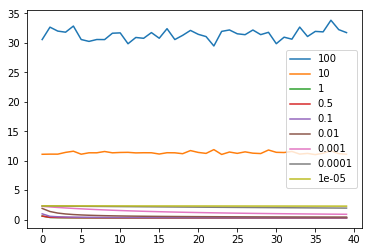

In [39]:
labels = [str(lrate) for lrate in lrates]
plot_costs(costs, labels)

You can observe in the above plot that with high learning rates 100 and 10, cost is too high and it is not decreasing with time. Instead it is really high compared to other learning rates. Your doubting part of the brain shoudl start bling now, since We decided on taking steps in the direction with steep descent. Therefore bigger the steps we take faster we reach the actual solution. However there is no learning in the high learning rates and  instead the error is increasing in many iterations with high learning rates. This condition works only if we take human steps, if we take hulk steps we many very well jump from a valley to mountain(I couldn't resist a Hulk analogy as the Thor:Ragnarök trailer dropped today).

Now let's remove the plots with learning rates 100 and 10 and have a closer look at the other learning rates

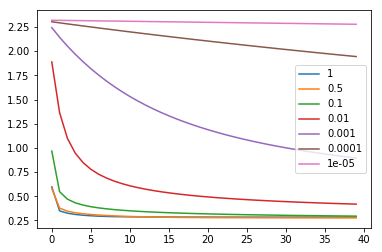

In [40]:
plot_costs(costs[2:], labels[2:])

Following the high values 100 and 10, 0.00001 has the highest cost and  the other learning rates cost decay is in the asceding order of their learning rates. This is obvious as we are taking small human steps, the decay is slower. Especially with learning_rate = 0.00001, the learning is so slow, it looks as if there is no learning at all. Let's remove every plot except the 1 and 0.5 and look even closer as they look like they are almost overlapping.

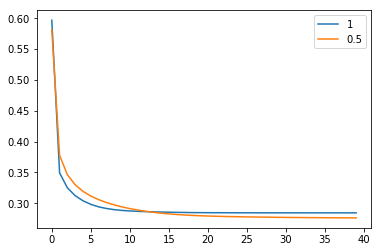

In [41]:
plot_costs(costs[2:4], labels[2:4])

If you closely observe the above plot, you can see that both the plots start at the same point but the the one with learning rate 1 descended more at early stages but 0.5 ended up lower compared to 1. This happened because at the minima, the distance to minima is tony and even the humans steps overstep the minima. So taking baby steps will help in this scenario and 0.5 got a better solution. You can ask me, then I did not suggest using 0.00001 which can give a solution even closer to actual solution? You can use that learning rate if you have the patience to wait forever. So, a middle learning rate would be ideal and you have to choose the learning rate keeping the cost vs training time in mind.

### Anealing the learning rate:
Till now we used a constant learning rate throughout the training process and tried to balance between the cost the training time. But what if can change the learning rate with time? In previous examples we saw that we need higher learning rates when we start the learning and we need small learning rates when we are nearer to convergence. We can This process is called Annealing the Learning rate. We can achieve that factor by setting the last value in the learning rate tuple. Using that learning rate will reduce by that amount for each epoch.

Let's see how our network performs with 


In [49]:
lr = get_lr(dataset_params)
learning_rates = (0.1, 1 , 0)
lr.train(epochs = (40),learning_rates = learning_rates, optimizer_type= 'sgd', early_terminate=False, verbose=0)

. Initializing the network
.. Adding input layer 0
.. Adding classifier layer 1
.. Adding flatten layer 2
.. Adding objective layer 3
.. Cooking the network
.. Setting up the visualizer
.. Setting up the resultor
.. Setting up the optimizer
.. All checks complete, cooking continues


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.578769
... Learning Rate       : 1.0
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.346417
... Learning Rate       : 0.899999976158
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.322975
... Learning Rate       : 0.810000002384
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.310759
... Learning Rate       : 0.728999972343
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.302905
... Learning Rate       : 0.656099975109
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.297313
... Learning Rate       : 0.590489983559
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.293089
... Learning Rate       : 0.531440973282
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.289889
... Learning Rate       : 0.478296875954
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.287356
... Learning Rate       : 0.430467188358
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.285265
... Learning Rate       : 0.387420475483
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.283531
... Learning Rate       : 0.348678439856
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.282163
... Learning Rate       : 0.313810586929
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.281065
... Learning Rate       : 0.282429516315
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.28013
... Learning Rate       : 0.254186570644
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.279324
... Learning Rate       : 0.22876791656
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.278636
... Learning Rate       : 0.205891117454
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.278046
... Learning Rate       : 0.185302004218
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.277528
... Learning Rate       : 0.166771799326
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.277073
... Learning Rate       : 0.150094613433
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.27667
... Learning Rate       : 0.135085150599
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276325
... Learning Rate       : 0.12157663703
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.276022
... Learning Rate       : 0.109418973327
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.275752
... Learning Rate       : 0.0984770730138
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.275513
... Learning Rate       : 0.0886293649673
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.2753
... Learning Rate       : 0.0797664299607
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.275114
... Learning Rate       : 0.0717897862196
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274953
... Learning Rate       : 0.0646108090878
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.27481
... Learning Rate       : 0.058149728924
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274683
... Learning Rate       : 0.0523347556591
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274568
... Learning Rate       : 0.0471012815833
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274466
... Learning Rate       : 0.0423911549151
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274374
... Learning Rate       : 0.0381520390511
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274292
... Learning Rate       : 0.034336835146
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274217
... Learning Rate       : 0.0309031512588
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.27415
... Learning Rate       : 0.0278128366917
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274089
... Learning Rate       : 0.0250315535814
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.274034
... Learning Rate       : 0.022528398782
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.273984
... Learning Rate       : 0.0202755592763
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.273939
... Learning Rate       : 0.0182480029762
... Momentum            : None


| training  100% Time: 0:00:00                                                 
| validation  100% Time: 0:00:00                                               


.. Cost                : 0.273899
... Learning Rate       : 0.0164232030511
... Momentum            : None


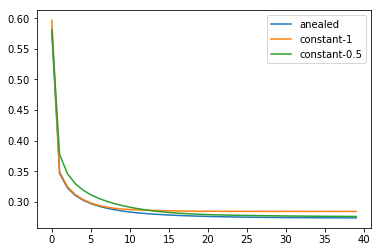

In [51]:
plt.plot(get_cost(), label='anealed')
plt.plot(costs[2], label = 'constant-1')
plt.plot(costs[3], label = 'constant-0.5')
plt.legend()
plt.show()

The above plot shows the difference in learning with and without learning. Annealed learning has a higher cost decay initially similar to constant learning rate. However, near the point of convergence 